In [381]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#!pip install plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
import datetime as dt
from datetime import timedelta
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score
import statsmodels.api as sm
from statsmodels.tsa.api import Holt,SimpleExpSmoothing,ExponentialSmoothing
from fbprophet import Prophet
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.tsa.stattools import adfuller
!pip install pmdarima
!pip install pyramid
from pmdarima import auto_arima
std=StandardScaler()
#pd.set_option('display.float_format', lambda x: '%.6f' % x)

In [382]:
covid=pd.read_csv("/content/TAMILNADU (2).csv")
covid.head()

,date,state,confirmed,new conf,% of conf,% of new conf,% of infected,recovered,new rec,% of rec,dead,new dead,% of dead,other,tested,% of tested,first dose,second dose,% of first dose,% of second dose
0,4/1/2021,Tamil Nadu,889490,2817,4.519481,0.014313,1.128794,859709,1634,96.651902,12738,19,1.432057,0,19681244,24.976198,2835444,279179,3.598279,0.354288
1,4/2/2021,Tamil Nadu,892780,3290,4.516447,0.016644,1.132970,861424,1715,96.487825,12750,12,1.428123,0,19767310,25.085419,2829190,272288,3.590343,0.345543
2,4/3/2021,Tamil Nadu,896226,3446,4.515132,0.017361,1.137343,863258,1834,96.321464,12764,14,1.424194,0,19849388,25.189579,2871776,279902,3.644386,0.355206
3,4/4/2021,Tamil Nadu,899807,3581,4.514343,0.017966,1.141887,865071,1813,96.139617,12778,14,1.420082,0,19932179,25.294643,2901208,285389,3.681736,0.362169
4,4/5/2021,Tamil Nadu,903479,3672,4.514633,0.018349,1.146547,866913,1842,95.952756,12789,11,1.415528,0,20012235,25.396237,2907580,298198,3.689822,0.378424


In [383]:
print("Size/Shape of the dataset: ",covid.shape)
print("Checking for null values:\n",covid.isnull().sum())
print("Checking Data-type of each column:\n",covid.dtypes)

Size/Shape of the dataset:  (183, 20)
Checking for null values:
 date                0
state               0
confirmed           0
new conf            0
% of conf           0
% of new conf       0
% of infected       0
recovered           0
new rec             0
% of rec            0
dead                0
new dead            0
% of dead           0
other               0
tested              0
% of tested         0
first dose          0
second dose         0
% of first dose     0
% of second dose    0
dtype: int64
Checking Data-type of each column:
 date                 object
state                object
confirmed             int64
new conf              int64
% of conf           float64
% of new conf       float64
% of infected       float64
recovered             int64
new rec               int64
% of rec            float64
dead                  int64
new dead              int64
% of dead           float64
other                 int64
tested                int64
% of tested         float6

In [384]:
covid["date"]=pd.to_datetime(covid["date"])

In [385]:
grouped=covid.groupby(["state","date"]).agg({"confirmed":'sum',"recovered":'sum',"dead":'sum'})
grouped

confirmed  recovered   dead
state      date                                   
Tamil Nadu 2021-04-01     889490     859709  12738
           2021-04-02     892780     861424  12750
           2021-04-03     896226     863258  12764
           2021-04-04     899807     865071  12778
           2021-04-05     903479     866913  12789
...                          ...        ...    ...
           2021-09-26    2657266    2604491  35490
           2021-09-27    2658923    2606153  35509
           2021-09-28    2660553    2607796  35526
           2021-09-29    2662177    2609435  35550
           2021-09-30    2663789    2611061  35578

[183 rows x 3 columns]

In [386]:
grouped["Active Cases"]=grouped["confirmed"]-grouped["recovered"]-grouped["dead"]
grouped["log_confirmed"]=np.log(grouped["confirmed"])
grouped["log_active"]=np.log(grouped["Active Cases"])
grouped

confirmed  recovered  ...  log_confirmed  log_active
state      date                              ...                           
Tamil Nadu 2021-04-01     889490     859709  ...      13.698404    9.743495
           2021-04-02     892780     861424  ...      13.702095    9.831239
           2021-04-03     896226     863258  ...      13.705948    9.913636
           2021-04-04     899807     865071  ...      13.709936    9.996887
           2021-04-05     903479     866913  ...      13.714008   10.076474
...                          ...        ...  ...            ...         ...
           2021-09-26    2657266    2604491  ...      14.792808    9.757594
           2021-09-27    2658923    2606153  ...      14.793432    9.756205
           2021-09-28    2660553    2607796  ...      14.794045    9.754465
           2021-09-29    2662177    2609435  ...      14.794655    9.752199
           2021-09-30    2663789    2611061  ...      14.795260    9.749753

[183 rows x 6 columns]

In [387]:
#Grouping different types of cases as per the date
datewise=covid.groupby(["date"]).agg({"confirmed":'sum',"recovered":'sum',"dead":'sum'})
datewise["Days Since"]=datewise.index-datewise.index.min()
datewise

,confirmed,recovered,dead,Days Since
date,,,,
2021-04-01,889490,859709,12738,0 days
2021-04-02,892780,861424,12750,1 days
2021-04-03,896226,863258,12764,2 days
2021-04-04,899807,865071,12778,3 days
2021-04-05,903479,866913,12789,4 days
...,...,...,...,...
2021-09-26,2657266,2604491,35490,178 days
2021-09-27,2658923,2606153,35509,179 days
2021-09-28,2660553,2607796,35526,180 days


In [388]:
print("Basic Information")
print("Totol number of countries with Disease Spread: ",len(covid["state"].unique()))
print("Total number of Confirmed Cases around the World: ",datewise["confirmed"].iloc[-1])
print("Total number of Recovered Cases around the World: ",datewise["recovered"].iloc[-1])
print("Total number of Deaths Cases around the World: ",datewise["dead"].iloc[-1])
print("Total number of Active Cases around the World: ",(datewise["confirmed"].iloc[-1]-datewise["recovered"].iloc[-1]-datewise["dead"].iloc[-1]))
print("Total number of Closed Cases around the World: ",datewise["recovered"].iloc[-1]+datewise["dead"].iloc[-1])
print("Approximate number of Confirmed Cases per Day around the World: ",np.round(datewise["confirmed"].iloc[-1]/datewise.shape[0]))
print("Approximate number of Recovered Cases per Day around the World: ",np.round(datewise["recovered"].iloc[-1]/datewise.shape[0]))
print("Approximate number of Death Cases per Day around the World: ",np.round(datewise["dead"].iloc[-1]/datewise.shape[0]))
print("Approximate number of Confirmed Cases per hour around the World: ",np.round(datewise["confirmed"].iloc[-1]/((datewise.shape[0])*24)))
print("Approximate number of Recovered Cases per hour around the World: ",np.round(datewise["recovered"].iloc[-1]/((datewise.shape[0])*24)))
print("Approximate number of Death Cases per hour around the World: ",np.round(datewise["dead"].iloc[-1]/((datewise.shape[0])*24)))
print("Number of Confirmed Cases in last 24 hours: ",datewise["confirmed"].iloc[-1]-datewise["confirmed"].iloc[-2])
print("Number of Recovered Cases in last 24 hours: ",datewise["recovered"].iloc[-1]-datewise["recovered"].iloc[-2])
print("Number of Death Cases in last 24 hours: ",datewise["dead"].iloc[-1]-datewise["dead"].iloc[-2])

Basic Information
Totol number of countries with Disease Spread:  1
Total number of Confirmed Cases around the World:  2663789
Total number of Recovered Cases around the World:  2611061
Total number of Deaths Cases around the World:  35578
Total number of Active Cases around the World:  17150
Total number of Closed Cases around the World:  2646639
Approximate number of Confirmed Cases per Day around the World:  14556.0
Approximate number of Recovered Cases per Day around the World:  14268.0
Approximate number of Death Cases per Day around the World:  194.0
Approximate number of Confirmed Cases per hour around the World:  607.0
Approximate number of Recovered Cases per hour around the World:  595.0
Approximate number of Death Cases per hour around the World:  8.0
Number of Confirmed Cases in last 24 hours:  1612
Number of Recovered Cases in last 24 hours:  1626
Number of Death Cases in last 24 hours:  28


In [389]:
fig=px.bar(x=datewise.index,y=datewise["confirmed"]-datewise["recovered"]-datewise["dead"])
fig.update_layout(title="Distribution of Number of Active Cases",
                  xaxis_title="Date",yaxis_title="Number of Cases",)
fig.show()

In [390]:
fig=px.bar(x=datewise.index,y=datewise["recovered"]+datewise["dead"])
fig.update_layout(title="Distribution of Number of Closed Cases",
                  xaxis_title="Date",yaxis_title="Number of Cases")
fig.show()

In [391]:
datewise["WeekOfYear"]=datewise.index.weekofyear

week_num=[]
weekwise_confirmed=[]
weekwise_recovered=[]
weekwise_deaths=[]
w=1
for i in list(datewise["WeekOfYear"].unique()):
    weekwise_confirmed.append(datewise[datewise["WeekOfYear"]==i]["confirmed"].iloc[-1])
    weekwise_recovered.append(datewise[datewise["WeekOfYear"]==i]["recovered"].iloc[-1])
    weekwise_deaths.append(datewise[datewise["WeekOfYear"]==i]["dead"].iloc[-1])
    week_num.append(w)
    w=w+1

fig=go.Figure()
fig.add_trace(go.Scatter(x=week_num, y=weekwise_confirmed,
                    mode='lines+markers',
                    name='Weekly Growth of Confirmed Cases'))
fig.add_trace(go.Scatter(x=week_num, y=weekwise_recovered,
                    mode='lines+markers',
                    name='Weekly Growth of Recovered Cases'))
fig.add_trace(go.Scatter(x=week_num, y=weekwise_deaths,
                    mode='lines+markers',
                    name='Weekly Growth of Death Cases'))
fig.update_layout(title="Weekly Growth of different types of Cases in Tamil Nadu",
                 xaxis_title="Week Number",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

Text(0.5, 1.0, 'Weekly increase in Number of Death Cases')

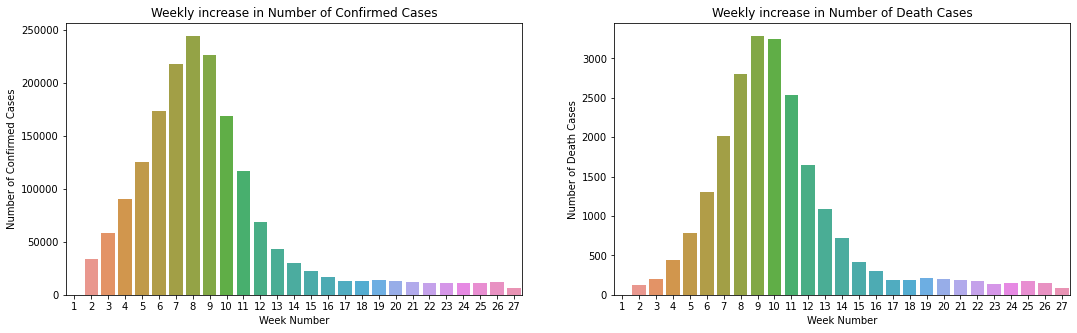

In [392]:
fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(18,5))
sns.barplot(x=week_num,y=pd.Series(weekwise_confirmed).diff().fillna(0),ax=ax1)
sns.barplot(x=week_num,y=pd.Series(weekwise_deaths).diff().fillna(0),ax=ax2)
ax1.set_xlabel("Week Number")
ax2.set_xlabel("Week Number")
ax1.set_ylabel("Number of Confirmed Cases")
ax2.set_ylabel("Number of Death Cases")
ax1.set_title("Weekly increase in Number of Confirmed Cases")
ax2.set_title("Weekly increase in Number of Death Cases")

GROWTH RATE OF TAMIL NADU


In [393]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["confirmed"],
                    mode='lines+markers',
                    name='Confirmed Cases'))
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["recovered"],
                    mode='lines+markers',
                    name='Recovered Cases'))
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["dead"],
                    mode='lines+markers',
                    name='Death Cases'))
fig.update_layout(title="Growth of different types of cases",
                 xaxis_title="Date",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [394]:
#Calculating the Mortality Rate and Recovery Rate
datewise["Mortality Rate"]=(datewise["dead"]/datewise["confirmed"])*100
datewise["Recovery Rate"]=(datewise["recovered"]/datewise["confirmed"])*100
datewise["Active Cases"]=datewise["confirmed"]-datewise["recovered"]-datewise["dead"]
datewise["Closed Cases"]=datewise["recovered"]+datewise["dead"]

print("Average Mortality Rate",datewise["Mortality Rate"].mean())
print("Median Mortality Rate",datewise["Mortality Rate"].median())
print("Average Recovery Rate",datewise["Recovery Rate"].mean())
print("Median Recovery Rate",datewise["Recovery Rate"].median())

#Plotting Mortality and Recovery Rate 
fig = make_subplots(rows=2, cols=1,
                   subplot_titles=("Recovery Rate", "Mortatlity Rate"))
fig.add_trace(
    go.Scatter(x=datewise.index, y=(datewise["recovered"]/datewise["confirmed"])*100,name="Recovery Rate"),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=datewise.index, y=(datewise["dead"]/datewise["confirmed"])*100,name="Mortality Rate"),
    row=2, col=1
)
fig.update_layout(height=1000,legend=dict(x=-0.1,y=1.2,traceorder="normal"))
fig.update_xaxes(title_text="Date", row=1, col=1)
fig.update_yaxes(title_text="Recovery Rate", row=1, col=1)
fig.update_xaxes(title_text="Date", row=1, col=2)
fig.update_yaxes(title_text="Mortality Rate", row=1, col=2)
fig.show()

Average Mortality Rate 1.2865367195204769
Median Mortality Rate 1.3301243747539837
Average Recovery Rate 94.06300245209003
Median Recovery Rate 97.17222243020525


In [395]:
datewise


,confirmed,recovered,dead,Days Since,WeekOfYear,Mortality Rate,Recovery Rate,Active Cases,Closed Cases
date,,,,,,,,,
2021-04-01,889490,859709,12738,0 days,13,1.432057,96.651902,17043,872447
2021-04-02,892780,861424,12750,1 days,13,1.428123,96.487825,18606,874174
2021-04-03,896226,863258,12764,2 days,13,1.424194,96.321464,20204,876022
2021-04-04,899807,865071,12778,3 days,13,1.420082,96.139617,21958,877849
2021-04-05,903479,866913,12789,4 days,14,1.415528,95.952756,23777,879702
...,...,...,...,...,...,...,...,...,...
2021-09-26,2657266,2604491,35490,178 days,38,1.335583,98.013936,17285,2639981
2021-09-27,2658923,2606153,35509,179 days,39,1.335466,98.015362,17261,2641662
2021-09-28,2660553,2607796,35526,180 days,39,1.335286,98.017066,17231,2643322


In [396]:
print("Average increase in number of Confirmed Cases every day: ",np.round(datewise["confirmed"].diff().fillna(0).mean()))
print("Average increase in number of Recovered Cases every day: ",np.round(datewise["recovered"].diff().fillna(0).mean()))
print("Average increase in number of Deaths Cases every day: ",np.round(datewise["dead"].diff().fillna(0).mean()))

fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["confirmed"].diff().fillna(0),mode='lines+markers',
                    name='Confirmed Cases'))
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["recovered"].diff().fillna(0),mode='lines+markers',
                    name='Recovered Cases'))
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["dead"].diff().fillna(0),mode='lines+markers',
                    name='Death Cases'))
fig.update_layout(title="Daily increase in different types of Cases",
                 xaxis_title="Date",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

Average increase in number of Confirmed Cases every day:  9696.0
Average increase in number of Recovered Cases every day:  9570.0
Average increase in number of Deaths Cases every day:  125.0


In [397]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["confirmed"].diff().rolling(window=7).mean(),mode='lines+markers',
                    name='Confirmed Cases'))
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["recovered"].diff().rolling(window=7).mean(),mode='lines+markers',
                    name='Recovered Cases'))
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["dead"].diff().rolling(window=7).mean(),mode='lines+markers',
                    name='Death Cases'))
fig.update_layout(title="7 Days Rolling Mean of Daily Increase of Confirmed, Recovered and Death Cases",
                 xaxis_title="Date",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

GROWTH FACTOR


In [398]:
print("Average growth factor of number of Confirmed Cases: ",(datewise["confirmed"]/datewise["confirmed"].shift()).mean())
print("Median growth factor of number of Confirmed Cases: ",(datewise["confirmed"]/datewise["confirmed"].shift()).median())
print("Average growth factor of number of Recovered Cases: ",(datewise["recovered"]/datewise["recovered"].shift()).mean())
print("Median growth factor of number of Recovered Cases: ",(datewise["recovered"]/datewise["recovered"].shift()).median())
print("Average growth factor of number of Death Cases: ",(datewise["dead"]/datewise["dead"].shift()).mean())
print("Median growth factor of number of Death Cases: ",(datewise["dead"]/datewise["dead"].shift()).median())

fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["confirmed"]/datewise["confirmed"].shift(),
                    mode='lines',
                    name='Growth Factor of Confirmed Cases'))
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["recovered"]/datewise["recovered"].shift(),
                    mode='lines',
                    name='Growth Factor of Recovered Cases'))
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["dead"]/datewise["dead"].shift(),
                    mode='lines',
                    name='Growth Factor of Death Cases'))
fig.update_layout(title="Datewise Growth Factor of different types of cases",
                 xaxis_title="Date",yaxis_title="Growth Factor",
                 legend=dict(x=0,y=-0.4,traceorder="normal"))
fig.show()

Average growth factor of number of Confirmed Cases:  1.006069734825774
Median growth factor of number of Confirmed Cases:  1.0017549267844301
Average growth factor of number of Recovered Cases:  1.0061461023330702
Median growth factor of number of Recovered Cases:  1.0020231437818872
Average growth factor of number of Death Cases:  1.0056837365728135
Median growth factor of number of Death Cases:  1.0015590297130896


In [399]:
R0=datewise["confirmed"]/datewise["confirmed"].shift()
R0

date
2021-04-01        nan
2021-04-02   1.003699
2021-04-03   1.003860
2021-04-04   1.003996
2021-04-05   1.004081
               ...   
2021-09-26   1.000638
2021-09-27   1.000624
2021-09-28   1.000613
2021-09-29   1.000610
2021-09-30   1.000606
Name: confirmed, Length: 183, dtype: float64

In [400]:
#growth factor for active and closed cases
fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, 
                         y=(datewise["confirmed"]-datewise["recovered"]-datewise["dead"])/(datewise["confirmed"]-datewise["recovered"]-datewise["dead"]).shift(),
                    mode='lines',
                    name='Growth Factor of Active Cases'))
fig.add_trace(go.Scatter(x=datewise.index, y=(datewise["recovered"]+datewise["dead"])/(datewise["recovered"]+datewise["dead"]).shift(),
                    mode='lines',
                    name='Growth Factor of Closed Cases'))
fig.update_layout(title="Datewise Growth Factor of Active and Closed Cases",
                 xaxis_title="Date",yaxis_title="Growth Factor",
                 legend=dict(x=0,y=-0.4,traceorder="normal"))
fig.show()

In [401]:
#linear regression


In [402]:
datewise["Days Since"]=datewise.index-datewise.index[0]
datewise["Days Since"]=datewise["Days Since"].dt.days

In [403]:
train_ml=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid_ml=datewise.iloc[int(datewise.shape[0]*0.95):]
model_scores=[]

In [404]:
lin_reg=LinearRegression(normalize=True)

In [405]:
lin_reg.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["recovered"]).reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [406]:
prediction_valid_linreg=lin_reg.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))

In [407]:
model_scores.append(np.sqrt(mean_squared_error(valid_ml["recovered"],prediction_valid_linreg)))
print("Root Mean Square Error for Linear Regression: ",np.sqrt(mean_squared_error(valid_ml["recovered"],prediction_valid_linreg)))

Root Mean Square Error for Linear Regression:  482014.01356419385


In [408]:
plt.figure(figsize=(11,6))
prediction_linreg=lin_reg.predict(np.array(datewise["Days Since"]).reshape(-1,1))
linreg_output=[]
for i in range(prediction_linreg.shape[0]):
    linreg_output.append(prediction_linreg[i][0])

fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["recovered"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=datewise.index, y=linreg_output,
                    mode='lines',name="Linear Regression Best Fit Line",
                    line=dict(color='black', dash='dot')))
fig.update_layout(title="Recovered Cases Linear Regression Prediction",
                 xaxis_title="Date",yaxis_title="Recovered Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

<Figure size 792x432 with 0 Axes>

In [409]:
#polynomial regression 
train_ml=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid_ml=datewise.iloc[int(datewise.shape[0]*0.95):]
poly = PolynomialFeatures(degree = 8) 

In [410]:
train_poly=poly.fit_transform(np.array(train_ml["Days Since"]).reshape(-1,1))
valid_poly=poly.fit_transform(np.array(valid_ml["Days Since"]).reshape(-1,1))
y=train_ml["recovered"]

In [411]:
linreg=LinearRegression(normalize=True)
linreg.fit(train_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [412]:
prediction_poly=linreg.predict(valid_poly)
rmse_poly=np.sqrt(mean_squared_error(valid_ml["recovered"],prediction_poly))
model_scores=[]
model_scores.append(rmse_poly)
print("Root Mean Squared Error for Polynomial Regression: ",rmse_poly)

Root Mean Squared Error for Polynomial Regression:  292292.78060313105


In [413]:
comp_data=poly.fit_transform(np.array(datewise["Days Since"]).reshape(-1,1))
plt.figure(figsize=(11,6))
predictions_poly=linreg.predict(comp_data)

fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["recovered"],
                    mode='lines+markers',name="Train Data for Recovered Cases"))
fig.add_trace(go.Scatter(x=datewise.index, y=predictions_poly,
                    mode='lines',name="Polynomial Regression Best Fit",
                    line=dict(color='black', dash='dot')))
fig.update_layout(title="Recovered Cases Polynomial Regression Prediction",
                 xaxis_title="Date",yaxis_title="Recovered Cases",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()


<Figure size 792x432 with 0 Axes>

SVM PREDICTION

In [414]:
train_ml=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid_ml=datewise.iloc[int(datewise.shape[0]*0.95):]

In [415]:
#Intializing SVR Model
svm=SVR(C=1,degree=6,kernel='poly',epsilon=0.01)

In [416]:
#Fitting model on the training data
svm.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["recovered"]).reshape(-1,1))

SVR(C=1, cache_size=200, coef0=0.0, degree=6, epsilon=0.01, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [417]:
prediction_valid_svm=svm.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))

In [418]:
model_scores.append(np.sqrt(mean_squared_error(valid_ml["recovered"],prediction_valid_svm)))
print("Root Mean Square Error for Support Vectore Machine: ",np.sqrt(mean_squared_error(valid_ml["recovered"],prediction_valid_svm)))

Root Mean Square Error for Support Vectore Machine:  506602.27534489415


In [419]:
plt.figure(figsize=(11,6))
prediction_svm=svm.predict(np.array(datewise["Days Since"]).reshape(-1,1))
fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["recovered"],
                    mode='lines+markers',name="Train Data for Recovered Cases"))
fig.add_trace(go.Scatter(x=datewise.index, y=prediction_svm,
                    mode='lines',name="Support Vector Machine Best fit Kernel",
                    line=dict(color='black', dash='dot')))
fig.update_layout(title="Recovered Cases Support Vectore Machine Regressor Prediction",
                 xaxis_title="Date",yaxis_title="Recovered Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

<Figure size 792x432 with 0 Axes>

In [420]:
#new polynomial
new_prediction_poly=[]
for i in range(1,93):
    new_date_poly=poly.fit_transform(np.array(datewise["Days Since"].max()+i).reshape(-1,1))
    new_prediction_poly.append(linreg.predict(new_date_poly)[0])

In [421]:
#new svm prediction
new_date=[]
new_prediction_svm=[]
for i in range(1,93):
    new_date.append(datewise.index[-1]+timedelta(days=i))
    new_prediction_svm.append(svm.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0])

In [422]:
pd.set_option('display.float_format', lambda x: '%.6f' % x)
model_predictions=pd.DataFrame(zip(new_date,new_prediction_poly,new_prediction_svm),
                               columns=["Dates","Polynonmial Regression Prediction","SVM Prediction"])
model_predictions

,Dates,Polynonmial Regression Prediction,SVM Prediction
0,2021-10-01,3263896.256396,3300489.346981
1,2021-10-02,3387951.193539,3340795.222408
2,2021-10-03,3528521.862789,3382211.374959
3,2021-10-04,3687218.189450,3424762.138209
4,2021-10-05,3865763.058548,3468472.243544
...,...,...,...
87,2021-12-27,822343715.328247,14596444.524034
88,2021-12-28,863315946.256822,14876999.877857
89,2021-12-29,906030424.730365,15162779.558636
90,2021-12-30,950548885.691100,15453861.105548


FORECASTING

HOLT'S LINEAR MODEL

In [423]:
model_train=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid=datewise.iloc[int(datewise.shape[0]*0.95):]
y_pred=valid.copy()

In [424]:
holt=Holt(np.asarray(model_train["recovered"])).fit(smoothing_level=0.4, smoothing_slope=0.4,optimized=False)     

In [425]:
y_pred["Holt"]=holt.forecast(10)
model_scores.append(np.sqrt(mean_squared_error(y_pred["recovered"],y_pred["Holt"])))
print("Root Mean Square Error Holt's Linear Model: ",np.sqrt(mean_squared_error(y_pred["recovered"],y_pred["Holt"])))

Root Mean Square Error Holt's Linear Model:  383.6198553465282


In [426]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["recovered"],
                    mode='lines+markers',name="Train Data for Recovered Cases"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["confirmed"],
                    mode='lines+markers',name="Validation Data for Recovered Cases",))
fig.add_trace(go.Scatter(x=valid.index, y=y_pred["Holt"],
                    mode='lines+markers',name="Prediction of Recovered Cases",))
fig.update_layout(title="Recovered Cases Holt's Linear Model Prediction",
                 xaxis_title="Date",yaxis_title="Recovered Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [427]:
#holt new prediction
holt_new_date=[]
holt_new_prediction=[]
for i in range(1,93):
    holt_new_date.append(datewise.index[-1]+timedelta(days=i))
    holt_new_prediction.append(holt.forecast((len(valid)+i))[-1])

model_predictions["Holt's Linear Model Prediction"]=holt_new_prediction
model_predictions

,Dates,Polynonmial Regression Prediction,SVM Prediction,Holt's Linear Model Prediction
0,2021-10-01,3263896.256396,3300489.346981,2612042.262151
1,2021-10-02,3387951.193539,3340795.222408,2613625.568805
2,2021-10-03,3528521.862789,3382211.374959,2615208.875460
3,2021-10-04,3687218.189450,3424762.138209,2616792.182115
4,2021-10-05,3865763.058548,3468472.243544,2618375.488769
...,...,...,...,...
87,2021-12-27,822343715.328247,14596444.524034,2749789.941103
88,2021-12-28,863315946.256822,14876999.877857,2751373.247757
89,2021-12-29,906030424.730365,15162779.558636,2752956.554412
90,2021-12-30,950548885.691100,15453861.105548,2754539.861067


HOLT'S WINTER MODEL

In [428]:
model_train=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid=datewise.iloc[int(datewise.shape[0]*0.95):]
y_pred=valid.copy()

In [429]:
es=ExponentialSmoothing(np.asarray(model_train['recovered']),seasonal_periods=14,trend='add', seasonal='mul').fit()

In [430]:
y_pred["Holt's Winter Model"]=es.forecast(len(valid))
model_scores.append(np.sqrt(mean_squared_error(y_pred["recovered"],y_pred["Holt's Winter Model"])))
print("Root Mean Square Error for Holt's Winter Model: ",np.sqrt(mean_squared_error(y_pred["recovered"],y_pred["Holt's Winter Model"])))

Root Mean Square Error for Holt's Winter Model:  6229.657122001604


In [431]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["recovered"],
                    mode='lines+markers',name="Train Data for Recovered Cases"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["recovered"],
                    mode='lines+markers',name="Validation Data for Recovered Cases",))
fig.add_trace(go.Scatter(x=valid.index, y=y_pred["Holt\'s Winter Model"],
                    mode='lines+markers',name="Prediction of Recovered Cases",))
fig.update_layout(title="Recovered Cases Holt's Winter Model Prediction",
                 xaxis_title="Date",yaxis_title="Recovered Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [432]:
#holt winter new prediction
holt_winter_new_prediction=[]
for i in range(1,93):
    holt_winter_new_prediction.append(es.forecast((len(valid)+i))[-1])
model_predictions["Holt's Winter Model Prediction"]=holt_winter_new_prediction
model_predictions.head()

,Dates,Polynonmial Regression Prediction,SVM Prediction,Holt's Linear Model Prediction,Holt's Winter Model Prediction
0,2021-10-01,3263896.256396,3300489.346981,2612042.262151,2620758.494431
1,2021-10-02,3387951.193539,3340795.222408,2613625.568805,2621927.702760
2,2021-10-03,3528521.862789,3382211.374959,2615208.875460,2623227.254118
3,2021-10-04,3687218.189450,3424762.138209,2616792.182115,2623871.536927
4,2021-10-05,3865763.058548,3468472.243544,2618375.488769,2626460.511657


In [433]:
model_train=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid=datewise.iloc[int(datewise.shape[0]*0.95):]
y_pred=valid.copy()

AR MODEL (AUTO ARIMA)

In [434]:
model_ar= auto_arima(model_train["recovered"],trace=True, error_action='ignore', start_p=0,start_q=0,max_p=4,max_q=0,
                   suppress_warnings=True,stepwise=False,seasonal=False)
model_ar.fit(model_train["recovered"])

 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=2811.706, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=2815.562, Time=0.03 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=2819.797, Time=0.07 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=2823.316, Time=0.25 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=2826.576, Time=0.12 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0] intercept
Total fit time: 0.494 seconds


ARIMA(maxiter=50, method='lbfgs', order=(0, 2, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [435]:
prediction_ar=model_ar.predict(len(valid))
y_pred["AR Model Prediction"]=prediction_ar

In [436]:
model_scores.append(np.sqrt(mean_squared_error(y_pred["recovered"],y_pred["AR Model Prediction"])))
print("Root Mean Square Error for AR Model: ",np.sqrt(mean_squared_error(y_pred["recovered"],y_pred["AR Model Prediction"])))

Root Mean Square Error for AR Model:  93.07771945308288


In [437]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["recovered"],
                    mode='lines+markers',name="Train Data for Recovered Cases"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["recovered"],
                    mode='lines+markers',name="Validation Data for Recovered Cases",))
fig.add_trace(go.Scatter(x=valid.index, y=y_pred["AR Model Prediction"],
                    mode='lines+markers',name="Prediction of Recovered Cases",))
fig.update_layout(title="Recovered Cases AR Model Prediction",
                 xaxis_title="Date",yaxis_title="Recovered Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [438]:
#ar model new prediction
AR_model_new_prediction=[]
for i in range(1,93):
    AR_model_new_prediction.append(model_ar.predict(len(valid)+i)[-1])
model_predictions["AR Model Prediction"]=AR_model_new_prediction
model_predictions.head()

,Dates,Polynonmial Regression Prediction,SVM Prediction,Holt's Linear Model Prediction,Holt's Winter Model Prediction,AR Model Prediction
0,2021-10-01,3263896.256396,3300489.346981,2612042.262151,2620758.494431,2612514.491228
1,2021-10-02,3387951.193539,3340795.222408,2613625.568805,2621927.702760,2614131.035088
2,2021-10-03,3528521.862789,3382211.374959,2615208.875460,2623227.254118,2615747.040936
3,2021-10-04,3687218.189450,3424762.138209,2616792.182115,2623871.536927,2617362.508772
4,2021-10-05,3865763.058548,3468472.243544,2618375.488769,2626460.511657,2618977.438596


MA MODEL (AUTO ARIMA)

In [439]:
model_train=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid=datewise.iloc[int(datewise.shape[0]*0.95):]
y_pred=valid.copy()

In [440]:
model_ma= auto_arima(model_train["recovered"],trace=True, error_action='ignore', start_p=0,start_q=0,max_p=0,max_q=2,
                   suppress_warnings=True,stepwise=False,seasonal=False)
model_ma.fit(model_train["recovered"])

 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=2811.706, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=2813.721, Time=0.09 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=2815.619, Time=0.21 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0] intercept
Total fit time: 0.327 seconds


ARIMA(maxiter=50, method='lbfgs', order=(0, 2, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [441]:
prediction_ma=model_ma.predict(len(valid))
y_pred["MA Model Prediction"]=prediction_ma

In [442]:
model_scores.append(np.sqrt(mean_squared_error(valid["recovered"],prediction_ma)))
print("Root Mean Square Error for MA Model: ",np.sqrt(mean_squared_error(valid["recovered"],prediction_ma)))

Root Mean Square Error for MA Model:  93.07771945308288


In [443]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["recovered"],
                    mode='lines+markers',name="Train Data for Recovered Cases"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["recovered"],
                    mode='lines+markers',name="Validation Data for Recovered Cases",))
fig.add_trace(go.Scatter(x=valid.index, y=y_pred["MA Model Prediction"],
                    mode='lines+markers',name="Prediction for Recovered Cases",))
fig.update_layout(title="Recovered Cases MA Model Prediction",
                 xaxis_title="Date",yaxis_title="Recovered Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [444]:
#ma model new prediction
MA_model_new_prediction=[]
for i in range(1,93):
    MA_model_new_prediction.append(model_ma.predict(len(valid)+i)[-1])
model_predictions["MA Model Prediction"]=MA_model_new_prediction
model_predictions.head()

,Dates,Polynonmial Regression Prediction,SVM Prediction,Holt's Linear Model Prediction,Holt's Winter Model Prediction,AR Model Prediction,MA Model Prediction
0,2021-10-01,3263896.256396,3300489.346981,2612042.262151,2620758.494431,2612514.491228,2612514.491228
1,2021-10-02,3387951.193539,3340795.222408,2613625.568805,2621927.702760,2614131.035088,2614131.035088
2,2021-10-03,3528521.862789,3382211.374959,2615208.875460,2623227.254118,2615747.040936,2615747.040936
3,2021-10-04,3687218.189450,3424762.138209,2616792.182115,2623871.536927,2617362.508772,2617362.508772
4,2021-10-05,3865763.058548,3468472.243544,2618375.488769,2626460.511657,2618977.438596,2618977.438596


ARIMA MODEL (AUTO ARIMA)

In [445]:
model_train=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid=datewise.iloc[int(datewise.shape[0]*0.95):]
y_pred=valid.copy()

In [446]:
model_arima= auto_arima(model_train["recovered"],trace=True, error_action='ignore', start_p=1,start_q=1,max_p=3,max_q=3,
                   suppress_warnings=True,stepwise=False,seasonal=False)
model_arima.fit(model_train["recovered"])

 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=2811.706, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=2813.721, Time=0.10 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=2815.619, Time=0.24 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=2817.554, Time=0.11 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=2815.562, Time=0.05 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=2805.230, Time=0.40 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=2809.279, Time=0.51 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=2810.333, Time=0.70 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=2819.797, Time=0.07 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=2809.572, Time=0.42 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=2825.855, Time=0.08 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=2817.385, Time=0.48 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=2823.316, Time=0.18 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=2824.982, Time=0.21 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=2827.865, Time=0.12 sec

Best mode

ARIMA(maxiter=50, method='lbfgs', order=(1, 2, 1), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [447]:
prediction_arima=model_arima.predict(len(valid))
y_pred["ARIMA Model Prediction"]=prediction_arima

In [448]:
model_scores.append(np.sqrt(mean_squared_error(valid["recovered"],prediction_arima)))
print("Root Mean Square Error for ARIMA Model: ",np.sqrt(mean_squared_error(valid["recovered"],prediction_arima)))

Root Mean Square Error for ARIMA Model:  7393.966170290545


In [449]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["recovered"],
                    mode='lines+markers',name="Train Data for Recovered Cases"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["recovered"],
                    mode='lines+markers',name="Validation Data for Recovered Cases",))
fig.add_trace(go.Scatter(x=valid.index, y=y_pred["ARIMA Model Prediction"],
                    mode='lines+markers',name="Prediction for Recovered Cases",))
fig.update_layout(title="Recovered Cases ARIMA Model Prediction",
                 xaxis_title="Date",yaxis_title="Recovered Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [450]:
ARIMA_model_new_prediction=[]
for i in range(1,93):
    ARIMA_model_new_prediction.append(model_arima.predict(len(valid)+i)[-1])
model_predictions["ARIMA Model Prediction"]=ARIMA_model_new_prediction
model_predictions.head()

,Dates,Polynonmial Regression Prediction,SVM Prediction,Holt's Linear Model Prediction,Holt's Winter Model Prediction,AR Model Prediction,MA Model Prediction,ARIMA Model Prediction
0,2021-10-01,3263896.256396,3300489.346981,2612042.262151,2620758.494431,2612514.491228,2612514.491228,2595400.151584
1,2021-10-02,3387951.193539,3340795.222408,2613625.568805,2621927.702760,2614131.035088,2614131.035088,2593898.397265
2,2021-10-03,3528521.862789,3382211.374959,2615208.875460,2623227.254118,2615747.040936,2615747.040936,2592134.664763
3,2021-10-04,3687218.189450,3424762.138209,2616792.182115,2623871.536927,2617362.508772,2617362.508772,2590108.730792
4,2021-10-05,3865763.058548,3468472.243544,2618375.488769,2626460.511657,2618977.438596,2618977.438596,2587820.376080


SARIMA MODEL (AUTO ARIMA)

In [451]:
model_sarima= auto_arima(model_train["recovered"],trace=True, error_action='ignore', 
                         start_p=0,start_q=0,max_p=2,max_q=2,m=7,
                   suppress_warnings=True,stepwise=True,seasonal=True)
model_sarima.fit(model_train["recovered"])

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(1,0,1)[7]             : AIC=2813.777, Time=0.17 sec
 ARIMA(0,2,0)(0,0,0)[7]             : AIC=2809.706, Time=0.01 sec
 ARIMA(1,2,0)(1,0,0)[7]             : AIC=2815.527, Time=0.14 sec
 ARIMA(0,2,1)(0,0,1)[7]             : AIC=2813.695, Time=0.30 sec
 ARIMA(0,2,0)(1,0,0)[7]             : AIC=2812.356, Time=0.03 sec
 ARIMA(0,2,0)(0,0,1)[7]             : AIC=2811.806, Time=0.06 sec
 ARIMA(1,2,0)(0,0,0)[7]             : AIC=2813.562, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[7]             : AIC=2811.721, Time=0.04 sec
 ARIMA(1,2,1)(0,0,0)[7]             : AIC=2808.845, Time=0.19 sec
 ARIMA(1,2,1)(1,0,0)[7]             : AIC=2815.028, Time=0.41 sec
 ARIMA(1,2,1)(0,0,1)[7]             : AIC=2815.024, Time=0.46 sec
 ARIMA(1,2,1)(1,0,1)[7]             : AIC=2817.231, Time=1.10 sec
 ARIMA(2,2,1)(0,0,0)[7]             : AIC=2814.767, Time=0.17 sec
 ARIMA(1,2,2)(0,0,0)[7]             : AIC=2814.424, Time=0.20 sec
 ARIMA(0,2,2)(0,0,0)[7]          

ARIMA(maxiter=50, method='lbfgs', order=(1, 2, 1), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 7),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [452]:
prediction_sarima=model_sarima.predict(len(valid))
y_pred["SARIMA Model Prediction"]=prediction_sarima

In [453]:
model_scores.append(np.sqrt(mean_squared_error(y_pred["recovered"],y_pred["SARIMA Model Prediction"])))
print("Root Mean Square Error for SARIMA Model: ",np.sqrt(mean_squared_error(y_pred["recovered"],y_pred["SARIMA Model Prediction"])))

Root Mean Square Error for SARIMA Model:  7393.966170290545


In [454]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["recovered"],
                    mode='lines+markers',name="Train Data for Recovered Cases"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["recovered"],
                    mode='lines+markers',name="Validation Data for Recovered Cases",))
fig.add_trace(go.Scatter(x=valid.index, y=y_pred["SARIMA Model Prediction"],
                    mode='lines+markers',name="Prediction for Recovered Cases",))
fig.update_layout(title="Recovered Cases SARIMA Model Prediction",
                 xaxis_title="Date",yaxis_title="Recovered Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [455]:
SARIMA_model_new_prediction=[]
for i in range(1,93):
    SARIMA_model_new_prediction.append(model_sarima.predict(len(valid)+i)[-1])
model_predictions["SARIMA Model Prediction"]=SARIMA_model_new_prediction
model_predictions.head()

,Dates,Polynonmial Regression Prediction,SVM Prediction,Holt's Linear Model Prediction,Holt's Winter Model Prediction,AR Model Prediction,MA Model Prediction,ARIMA Model Prediction,SARIMA Model Prediction
0,2021-10-01,3263896.256396,3300489.346981,2612042.262151,2620758.494431,2612514.491228,2612514.491228,2595400.151584,2595400.151584
1,2021-10-02,3387951.193539,3340795.222408,2613625.568805,2621927.702760,2614131.035088,2614131.035088,2593898.397265,2593898.397265
2,2021-10-03,3528521.862789,3382211.374959,2615208.875460,2623227.254118,2615747.040936,2615747.040936,2592134.664763,2592134.664763
3,2021-10-04,3687218.189450,3424762.138209,2616792.182115,2623871.536927,2617362.508772,2617362.508772,2590108.730792,2590108.730792
4,2021-10-05,3865763.058548,3468472.243544,2618375.488769,2626460.511657,2618977.438596,2618977.438596,2587820.376080,2587820.376080


FB PROPHET

In [456]:
prophet_c=Prophet(interval_width=0.95,weekly_seasonality=True,)
prophet_confirmed=pd.DataFrame(zip(list(datewise.index),list(datewise["recovered"])),columns=['ds','y'])

In [457]:
prophet_c.fit(prophet_confirmed)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [458]:
forecast_c=prophet_c.make_future_dataframe(periods=92)
forecast_confirmed=forecast_c.copy()

In [459]:
confirmed_forecast=prophet_c.predict(forecast_c)
#i]k,print(confirmed_forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']])

In [460]:
model_scores.append(np.sqrt(mean_squared_error(datewise["recovered"],confirmed_forecast['yhat'].head(datewise.shape[0]))))
print("Root Mean Squared Error for Prophet Model: ",np.sqrt(mean_squared_error(datewise["recovered"],confirmed_forecast['yhat'].head(datewise.shape[0]))))

Root Mean Squared Error for Prophet Model:  969.806821270373


Figure(720x432)


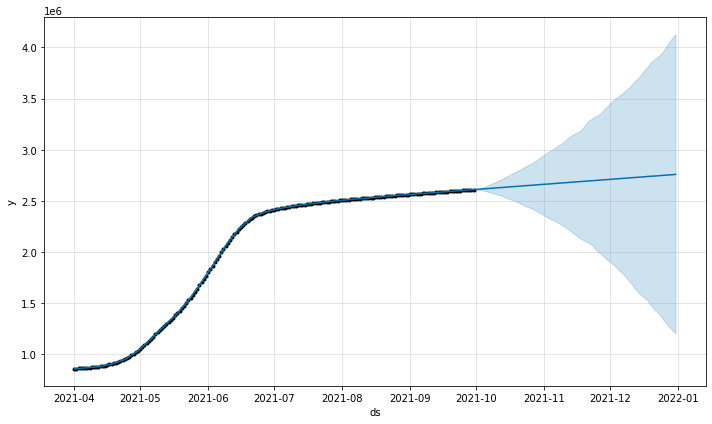

In [461]:
print(prophet_c.plot(confirmed_forecast))

Figure(648x432)


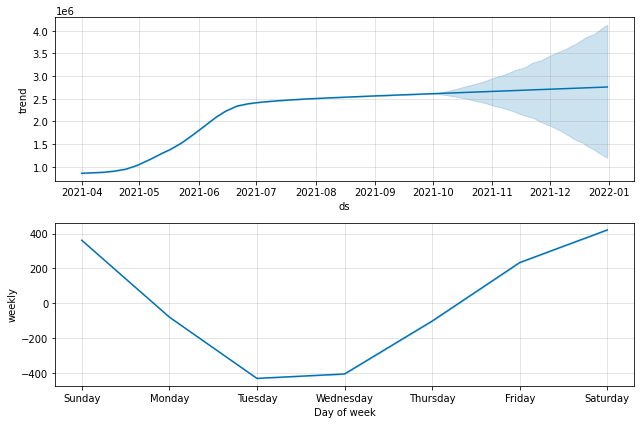

In [462]:
print(prophet_c.plot_components(confirmed_forecast))

In [463]:
model_names=["Holt's Linear","ARIMA Model","Facebook's Prophet Model"]
model_summary=pd.DataFrame(zip(model_names,model_scores),columns=["Model Name","Root Mean Squared Error"]).sort_values(["Root Mean Squared Error"])
model_summary

,Model Name,Root Mean Squared Error
2,Facebook's Prophet Model,383.619855
0,Holt's Linear,292292.780603
1,ARIMA Model,506602.275345


In [464]:
model_predictions["Prophet's Prediction"]=list(confirmed_forecast["yhat"].tail(92))
model_predictions["Prophet's Upper Bound"]=list(confirmed_forecast["yhat_upper"].tail(92))
model_predictions

,Dates,Polynonmial Regression Prediction,SVM Prediction,Holt's Linear Model Prediction,Holt's Winter Model Prediction,AR Model Prediction,MA Model Prediction,ARIMA Model Prediction,SARIMA Model Prediction,Prophet's Prediction,Prophet's Upper Bound
0,2021-10-01,3263896.256396,3300489.346981,2612042.262151,2620758.494431,2612514.491228,2612514.491228,2595400.151584,2595400.151584,2612950.757138,2615480.348332
1,2021-10-02,3387951.193539,3340795.222408,2613625.568805,2621927.702760,2614131.035088,2614131.035088,2593898.397265,2593898.397265,2614750.246433,2619624.894443
2,2021-10-03,3528521.862789,3382211.374959,2615208.875460,2623227.254118,2615747.040936,2615747.040936,2592134.664763,2592134.664763,2616303.351126,2626291.279340
3,2021-10-04,3687218.189450,3424762.138209,2616792.182115,2623871.536927,2617362.508772,2617362.508772,2590108.730792,2590108.730792,2617475.172617,2632019.982252
4,2021-10-05,3865763.058548,3468472.243544,2618375.488769,2626460.511657,2618977.438596,2618977.438596,2587820.376080,2587820.376080,2618735.891659,2639145.372353
...,...,...,...,...,...,...,...,...,...,...,...
87,2021-12-27,822343715.328247,14596444.524034,2749789.941103,2808610.851385,2751141.105263,2751141.105263,1467833.542114,1467833.542114,2752914.478574,4018000.029133
88,2021-12-28,863315946.256822,14876999.877857,2751373.247757,2811227.240605,2752710.842105,2752710.842105,1443007.660022,1443007.660022,2754175.197616,4048468.115439
89,2021-12-29,906030424.730365,15162779.558636,2752956.554412,2814271.329537,2754280.040936,2754280.040936,1417909.947952,1417909.947952,2755812.810880,4080592.144368
90,2021-12-30,950548885.691100,15453861.105548,2754539.861067,2817598.692252,2755848.701754,2755848.701754,1392540.359909,1392540.359909,2757728.576288,4108159.555251


In [465]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["dead"],
                    mode='lines+markers',name="Death Cases"))
fig.update_layout(title="Death Cases",
                 xaxis_title="Date",yaxis_title="Number of Death Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [466]:
model_train=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid=datewise.iloc[int(datewise.shape[0]*0.95):]
y_pred=valid.copy()

In [467]:
model_arima_deaths=auto_arima(model_train["dead"],trace=True, error_action='ignore', start_p=0,start_q=0,
                              max_p=5,max_q=5,suppress_warnings=True,stepwise=False,seasonal=False)     
model_arima_deaths.fit(model_train["dead"])

 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=1545.291, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=1541.021, Time=0.07 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=1542.334, Time=0.11 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=1535.494, Time=0.17 sec
 ARIMA(0,2,4)(0,0,0)[0] intercept   : AIC=1532.634, Time=0.24 sec
 ARIMA(0,2,5)(0,0,0)[0] intercept   : AIC=1534.429, Time=0.44 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=1541.115, Time=0.08 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=1542.853, Time=0.10 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=1510.147, Time=0.24 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=1500.022, Time=0.37 sec
 ARIMA(1,2,4)(0,0,0)[0] intercept   : AIC=1501.498, Time=0.48 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=1542.252, Time=0.09 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=1543.580, Time=0.16 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=1525.109, Time=0.51 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=1500.738, Time=0.51 sec
 ARIMA(3,2

ARIMA(maxiter=50, method='lbfgs', order=(1, 2, 3), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [468]:
predictions_deaths=model_arima_deaths.predict(len(valid))
y_pred["ARIMA Death Prediction"]=predictions_deaths

In [469]:
print("Root Mean Square Error: ",np.sqrt(mean_squared_error(valid["dead"],predictions_deaths)))

Root Mean Square Error:  5.153643859454865


In [470]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["dead"],
                    mode='lines+markers',name="Train Data for Death Cases"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["dead"],
                    mode='lines+markers',name="Validation Data for Death Cases",))
fig.add_trace(go.Scatter(x=valid.index, y=y_pred["ARIMA Death Prediction"],
                    mode='lines+markers',name="Prediction for Death Cases",))
fig.update_layout(title="Death Cases ARIMA Model Prediction",
                 xaxis_title="Date",yaxis_title="Death Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [471]:
ARIMA_model_death_forecast=[]
for i in range(1,18):
    ARIMA_model_death_forecast.append(model_arima_deaths.predict(len(valid)+i)[-1])

In [472]:
pd.DataFrame(zip(new_date,ARIMA_model_death_forecast),columns=["Deaths","ARIMA Model Death Forecast"]).head()

,Deaths,ARIMA Model Death Forecast
0,2021-10-01,35587.082555
1,2021-10-02,35603.919846
2,2021-10-03,35620.253200
3,2021-10-04,35636.110610
4,2021-10-05,35651.518711


In [473]:
model_predictions

,Dates,Polynonmial Regression Prediction,SVM Prediction,Holt's Linear Model Prediction,Holt's Winter Model Prediction,AR Model Prediction,MA Model Prediction,ARIMA Model Prediction,SARIMA Model Prediction,Prophet's Prediction,Prophet's Upper Bound
0,2021-10-01,3263896.256396,3300489.346981,2612042.262151,2620758.494431,2612514.491228,2612514.491228,2595400.151584,2595400.151584,2612950.757138,2615480.348332
1,2021-10-02,3387951.193539,3340795.222408,2613625.568805,2621927.702760,2614131.035088,2614131.035088,2593898.397265,2593898.397265,2614750.246433,2619624.894443
2,2021-10-03,3528521.862789,3382211.374959,2615208.875460,2623227.254118,2615747.040936,2615747.040936,2592134.664763,2592134.664763,2616303.351126,2626291.279340
3,2021-10-04,3687218.189450,3424762.138209,2616792.182115,2623871.536927,2617362.508772,2617362.508772,2590108.730792,2590108.730792,2617475.172617,2632019.982252
4,2021-10-05,3865763.058548,3468472.243544,2618375.488769,2626460.511657,2618977.438596,2618977.438596,2587820.376080,2587820.376080,2618735.891659,2639145.372353
...,...,...,...,...,...,...,...,...,...,...,...
87,2021-12-27,822343715.328247,14596444.524034,2749789.941103,2808610.851385,2751141.105263,2751141.105263,1467833.542114,1467833.542114,2752914.478574,4018000.029133
88,2021-12-28,863315946.256822,14876999.877857,2751373.247757,2811227.240605,2752710.842105,2752710.842105,1443007.660022,1443007.660022,2754175.197616,4048468.115439
89,2021-12-29,906030424.730365,15162779.558636,2752956.554412,2814271.329537,2754280.040936,2754280.040936,1417909.947952,1417909.947952,2755812.810880,4080592.144368
90,2021-12-30,950548885.691100,15453861.105548,2754539.861067,2817598.692252,2755848.701754,2755848.701754,1392540.359909,1392540.359909,2757728.576288,4108159.555251


In [474]:
model_predictions=model_predictions.groupby(["Dates"]).agg({"Holt's Linear Model Prediction":'sum',"MA Model Prediction":'sum',"ARIMA Model Prediction":'sum',"SARIMA Model Prediction":'sum'})
model_predictions=model_predictions[0:92]
model_predictions

,Holt's Linear Model Prediction,MA Model Prediction,ARIMA Model Prediction,SARIMA Model Prediction
Dates,,,,
2021-10-01,2612042.262151,2612514.491228,2595400.151584,2595400.151584
2021-10-02,2613625.568805,2614131.035088,2593898.397265,2593898.397265
2021-10-03,2615208.875460,2615747.040936,2592134.664763,2592134.664763
2021-10-04,2616792.182115,2617362.508772,2590108.730792,2590108.730792
2021-10-05,2618375.488769,2618977.438596,2587820.376080,2587820.376080
...,...,...,...,...
2021-12-27,2749789.941103,2751141.105263,1467833.542114,1467833.542114
2021-12-28,2751373.247757,2752710.842105,1443007.660022,1443007.660022
2021-12-29,2752956.554412,2754280.040936,1417909.947952,1417909.947952


In [475]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_predictions.index, y=model_predictions["Holt's Linear Model Prediction"],
                    mode='lines+markers',
                    name="Holt's Linear Model Prediction"))

fig.add_trace(go.Scatter(x=model_predictions.index, y=model_predictions["ARIMA Model Prediction"],
                    mode='lines+markers',
                    name='ARIMA Model Prediction'))

fig.update_layout(title="Prediction of Recovery cases",
                 xaxis_title="Date",yaxis_title="Number of cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [476]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["recovered"],
                    mode='lines+markers',name="Train Data for Recovery Cases"))

fig.add_trace(go.Scatter(x=model_predictions.index, y=model_predictions["ARIMA Model Prediction"],
                    mode='lines+markers',name="Prediction for Recovery Cases",))
fig.update_layout(title="Recovery Cases ARIMA Model Prediction",
                 xaxis_title="Date",yaxis_title="Recovery Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [477]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["recovered"],
                    mode='lines+markers',name="Train Data for Recovery Cases"))

fig.add_trace(go.Scatter(x=model_predictions.index, y=model_predictions["Holt's Linear Model Prediction"],
                    mode='lines+markers',name="Prediction for Recovery Cases",))
fig.update_layout(title="Recovery Cases Holt's Linear Model Prediction",
                 xaxis_title="Date",yaxis_title="Recovery Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()